In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sas

In [2]:
data = pd.read_excel("sportsdata.xlsx",sheet_name="data")

In [3]:
data.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [4]:
data.shape

(2930, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [6]:
data.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [7]:
data.isnull().sum().sum()

789

# Missing value treatment

# 1)Age

In [8]:
print("mean age",data["Avg_team_Age"].mean())
print("mode age",data["Avg_team_Age"].mode())
print("median",data["Avg_team_Age"].median())

mean age 29.242852100247088
mode age 0    30.0
Name: Avg_team_Age, dtype: float64
median 30.0


In [9]:
data["Avg_team_Age"] = data["Avg_team_Age"].fillna(data["Avg_team_Age"].median())

# 2) Match type

In [10]:
pd.value_counts(data["Match_light_type"])

Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64

In [11]:
data["Match_light_type"] = data["Match_light_type"].fillna("NaN")

In [12]:
pd.value_counts(data["Match_light_type"])

Day              2041
Day and Night     541
Night             296
NaN                52
Name: Match_light_type, dtype: int64

# 3)Match_format

In [13]:
pd.value_counts(data["Match_format"])

ODI     1865
T20      870
Test     125
Name: Match_format, dtype: int64

In [14]:
data["Match_format"] = data["Match_format"].dropna()

In [15]:
pd.value_counts(data["Match_format"])

ODI     1865
T20      870
Test     125
Name: Match_format, dtype: int64

# 4)Bowler in match

In [16]:
bowl=data["Bowlers_in_team"].mode()

In [17]:
data["Bowlers_in_team"]= data["Bowlers_in_team"].fillna(3.0)

In [18]:
pd.value_counts(data["Bowlers_in_team"])

3.0    1187
4.0     775
2.0     547
1.0     329
5.0      92
Name: Bowlers_in_team, dtype: int64

# 5) All_rounder_in_team

In [19]:
pd.value_counts(data["All_rounder_in_team"])

3.0    892
4.0    877
2.0    563
1.0    558
Name: All_rounder_in_team, dtype: int64

In [20]:
data["All_rounder_in_team"].median()

3.0

In [21]:
data["All_rounder_in_team"] = data["All_rounder_in_team"].fillna(3.0)

In [22]:
pd.value_counts(data["All_rounder_in_team"])

3.0    932
4.0    877
2.0    563
1.0    558
Name: All_rounder_in_team, dtype: int64

# 6) First_selection

In [23]:
data["First_selection"].mode()

0    Bowling
Name: First_selection, dtype: object

In [24]:
data["First_selection"] = data["First_selection"].fillna("Bowling")

In [25]:
pd.value_counts(data["First_selection"])

Bowling    1781
Batting    1149
Name: First_selection, dtype: int64

# 7)Opponent

In [26]:
data["Opponent"] = data["Opponent"].dropna() 

In [27]:
pd.value_counts(data["Opponent"])

South Africa    640
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: Opponent, dtype: int64

# 8) season

In [28]:
pd.value_counts(data["Season"])

Rainy     1309
Summer     918
Winter     641
Name: Season, dtype: int64

In [29]:
data["Season"] = data["Season"].dropna()

In [30]:
pd.value_counts(data["Season"])

Rainy     1309
Summer     918
Winter     641
Name: Season, dtype: int64

# 9) Audience_number

In [31]:
data["Audience_number"].mean()

46267.96068796069

In [32]:
data["Audience_number"] = data["Audience_number"].fillna(46268)

# 10)Offshore

In [33]:
data["Offshore"] = data["Offshore"].dropna

# 11)Max_run_scored_1over

In [34]:
data["Max_run_scored_1over"].median()

14.0

In [35]:
data["Max_run_scored_1over"] = data["Max_run_scored_1over"].fillna(14.0)

In [36]:
data["Max_run_scored_1over"].mean()

15.18839590443686

# 12) Extra_bowls_bowled

In [37]:
data["Extra_bowls_bowled"].median()

10.0

In [38]:
data["Extra_bowls_bowled"] = data["Extra_bowls_bowled"].fillna(10.0)

# 13) Min_run_scored_1over

In [39]:
data["Min_run_scored_1over"].median() 

3.0

In [40]:
data["Min_run_scored_1over"].mode() 

0    3.0
Name: Min_run_scored_1over, dtype: float64

In [41]:
data["Min_run_scored_1over"].mean() 

2.7626593179469516

In [42]:
data["Min_run_scored_1over"] = data["Min_run_scored_1over"].fillna(3.0)

# 14) Max_run_given_1over

In [43]:
data["Max_run_given_1over"].mean()

8.669198895027625

In [44]:
data["Max_run_given_1over"].median()

6.0

In [45]:
data["Max_run_given_1over"].mode()

0    6.0
Name: Max_run_given_1over, dtype: float64

In [46]:
data["Max_run_given_1over"] = data["Max_run_given_1over"].fillna(6)

# 15) player_highest_run

In [47]:
data["player_highest_run"].mean()

65.8893866299104

In [48]:
data["player_highest_run"].mode()

0    66.0
Name: player_highest_run, dtype: float64

In [49]:
data["player_highest_run"]= data["player_highest_run"].fillna(66.0)

In [50]:
data.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age               0
Match_light_type           0
Match_format              70
Bowlers_in_team            0
Wicket_keeper_in_team      0
All_rounder_in_team        0
First_selection            0
Opponent                  36
Season                    62
Audience_number            0
Offshore                   0
Max_run_scored_1over       0
Max_wicket_taken_1over     0
Extra_bowls_bowled         0
Min_run_given_1over        0
Min_run_scored_1over       0
Max_run_given_1over        0
extra_bowls_opponent       0
player_highest_run         0
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2930 non-null   float64
 3   Match_light_type        2930 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2930 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2930 non-null   float64
 8   First_selection         2930 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2930 non-null   float64
 12  Offshore                2930 non-null   object 
 13  Max_run_scored_1over    2930 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [52]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2930.0,29.267918,2.230540,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2930.0,2.916041,1.009573,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2930.0,2.726280,1.085690,1.0,2.0,3.0,4.00,4.0
Audience_number,2930.0,46267.961775,47922.871834,7063.0,20608.0,35189.0,55931.75,1399930.0
Max_run_scored_1over,2930.0,15.188396,3.645339,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2930.0,11.240273,7.743208,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2930.0,2.764846,0.702864,1.0,2.0,3.0,3.00,4.0


# Univariate analysis

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Result', ylabel='count'>

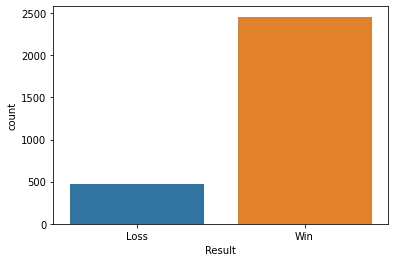

In [53]:
sas.countplot(data["Result"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Match_format', ylabel='count'>

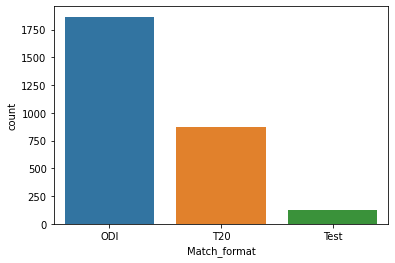

In [54]:
sas.countplot(data["Match_format"])


South Africa    640
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: Opponent, dtype: int64


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Opponent', ylabel='count'>

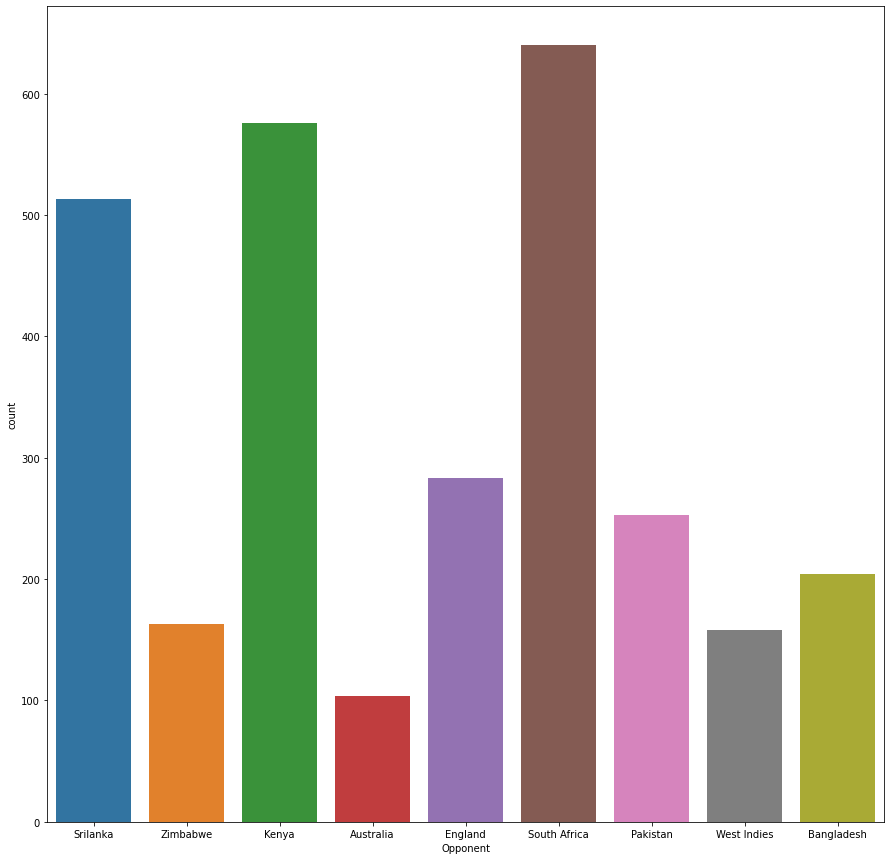

In [55]:
plt.figure(figsize=(15,15))
print(pd.value_counts(data["Opponent"]))
sas.countplot(data["Opponent"])


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

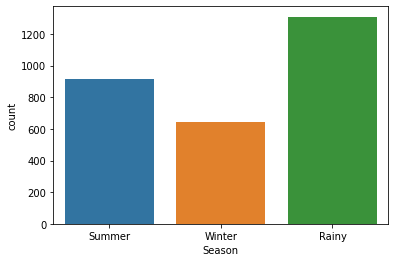

In [56]:
sas.countplot(data["Season"])


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Match_light_type', ylabel='count'>

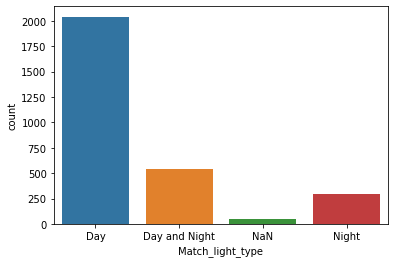

In [57]:
sas.countplot(data["Match_light_type"])

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='First_selection', ylabel='count'>

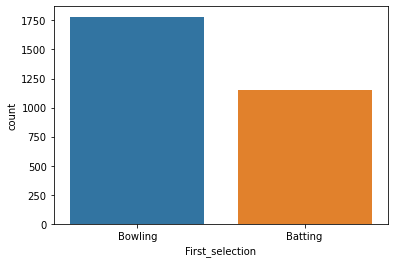

In [58]:
sas.countplot(data["First_selection"])

<AxesSubplot:xlabel='Avg_team_Age', ylabel='Count'>

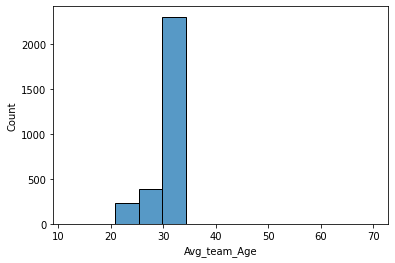

In [59]:
sas.histplot(data["Avg_team_Age"])

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
drt = DecisionTreeClassifier()

In [69]:
drt.fit(x,y)

DecisionTreeClassifier()

In [81]:
imp=pd.DataFrame(drt.feature_importances_,index = x.columns,columns = ["Imp"])

In [84]:
imp .sort_values(by = "Imp", ascending=False)

,Imp
Audience_number,0.121158
Extra_bowls_bowled,0.117120
Max_run_scored_1over,0.108111
player_highest_run,0.107439
Opponent,0.061674
All_rounder_in_team,0.059018
Players_scored_zero,0.054185
extra_bowls_opponent,0.053800
Min_run_given_1over,0.046034
Avg_team_Age,0.042538


In [62]:

    
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2930 non-null   float64
 3   Match_light_type        2930 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2930 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2930 non-null   float64
 8   First_selection         2930 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2930 non-null   float64
 12  Offshore                2930 non-null   object 
 13  Max_run_scored_1over    2930 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [66]:
for i in data.columns:
    if data[i].dtype =="object":
        data[i] =  pd.Categorical(data[i]).codes

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   int16  
 1   Result                  2930 non-null   int8   
 2   Avg_team_Age            2930 non-null   float64
 3   Match_light_type        2930 non-null   int8   
 4   Match_format            2930 non-null   int8   
 5   Bowlers_in_team         2930 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2930 non-null   float64
 8   First_selection         2930 non-null   int8   
 9   Opponent                2930 non-null   int8   
 10  Season                  2930 non-null   int8   
 11  Audience_number         2930 non-null   float64
 12  Offshore                2930 non-null   int8   
 13  Max_run_scored_1over    2930 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [68]:
x = data.drop(["Game_number","Result"],axis = 1)
y = data["Result"]

In [70]:
drt.

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_params'